## Load dataset

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

## Data Exploration

In [5]:
df.value_counts('Outcome')

Outcome
0    500
1    268
dtype: int64

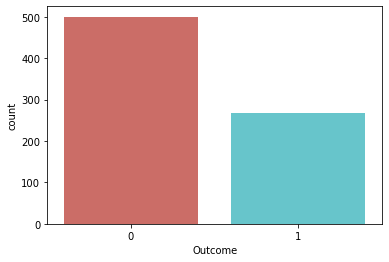

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data=df,x='Outcome',palette='hls')
plt.show()

In [7]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


## Split Dataset

In [8]:
X= pd.DataFrame(df.iloc[:,:-1])# all except outcome column
y= pd.DataFrame(df.iloc[:,-1])#outcome column

In [9]:
#Divide the dataset into two parts for training and testing in 70% and 30% proportion
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=1)

## Create and Train model

In [10]:
#Create and train Logistic Regression Model on training set
from sklearn.linear_model import LogisticRegression 
#create instance 
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [25]:
output=logmodel.predict(X_test.iloc[:1,:])
output=round(output[0],2)
output

0

## Predicting the test results

In [11]:
y_pred = logmodel.predict(X_test[0])
y_pred

KeyError: 0

## Calculating the accuracy

In [ ]:
print('Accuracy : %d', (logmodel.score(X_test,y_test)))

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
#plot logistic regression curve
x=X_test['Glucose']
sns.regplot(x=x, y=y_pred, data=df, logistic=True, ci=None)

## Evaluate model using Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix_value = confusion_matrix(y_test,y_pred)
print(confusion_matrix_value)

In [ ]:
(132+49)/(132+14+36+49)

The test result explains there are 132+49 correct predictions and 36+14 wrong predictions

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve
logit_roc_auc = roc_auc_score(y_test,logmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test,logmodel.predict_log_proba(X_test)[:,1])
plt.figure() 
plt.plot(fpr,tpr,label='Logistic Regression (area = %0.2f")' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True Positive rate')
plt.title('Reciever operating charactersics')
plt.legend(loc="lower right")
#plt.savefig('Log_Roc')
plt.show()

In [ ]:
import pickle
# open a file, where you ant to store the data
file = open('model.pkl', 'wb')

# dump information to that file
pickle.dump(logmodel, file)